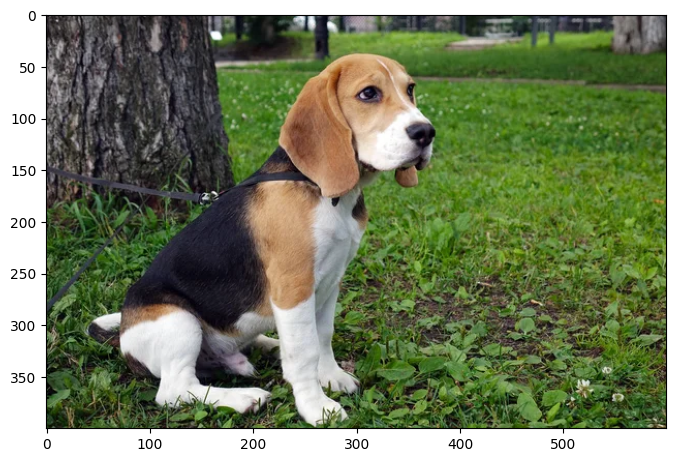

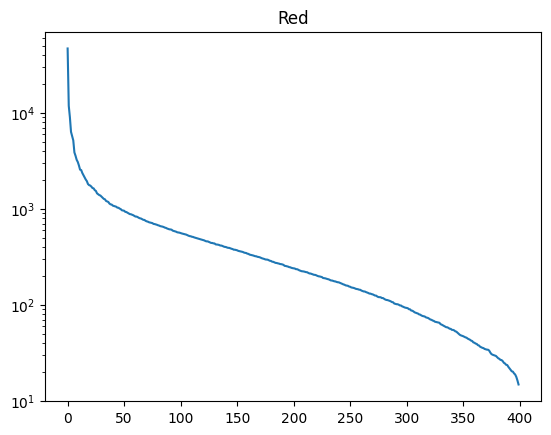

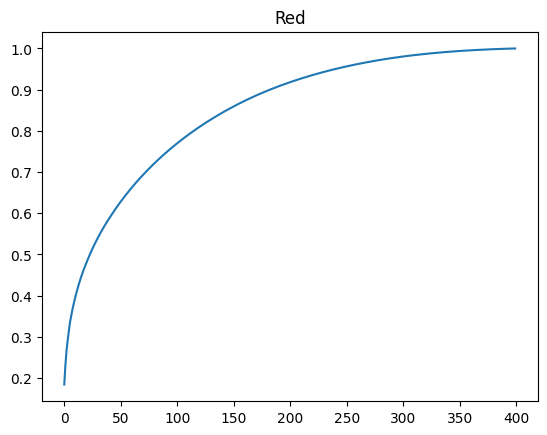

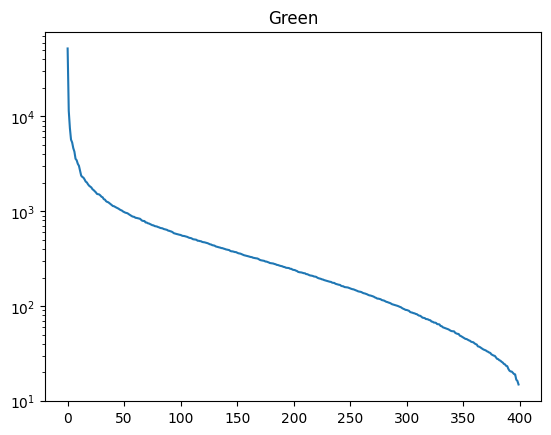

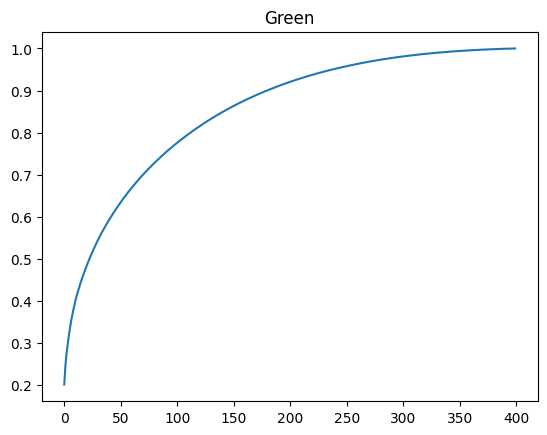

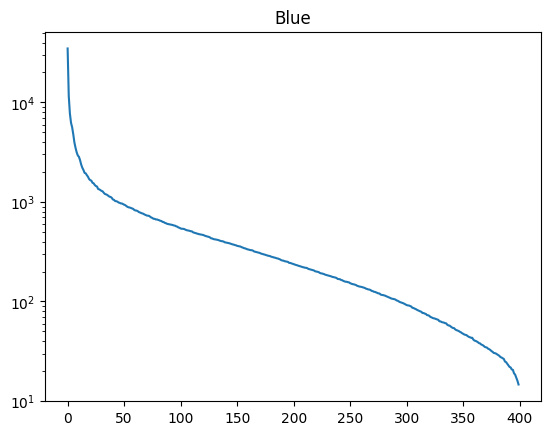

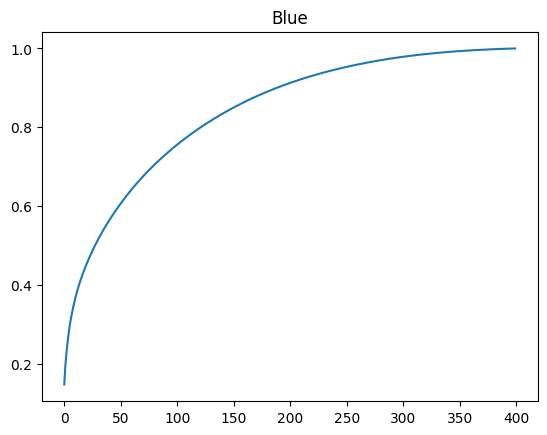

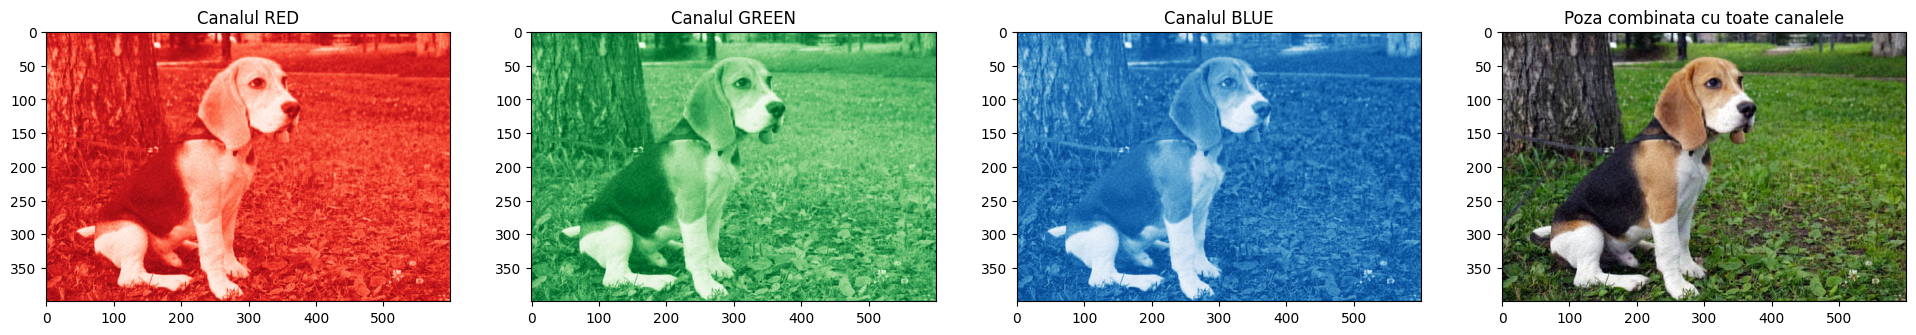

In [2]:
import numpy as np
from PIL import Image
from math import sqrt
from numpy.linalg import norm
from random import normalvariate
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from tqdm import tqdm
import warnings
from sklearn.datasets import load_digits

warnings.filterwarnings('ignore')

# Incarcam imaginea
image = Image.open('poza.jpg')
im = cv2.imread('poza.jpg')

# Afisam imaginea
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()


def svd_compressor(image, order, name):
    # Intoarce imaginea compresata la rankul specificat

    # Cream un vector plin cu 0 sub forma imaginii
    Ak = np.zeros(image.shape)

    # Aflam U, S (sigma) si V folosind functia din python (Aplicam SVD)
    [U, S, V] = np.linalg.svd(image)

    # Plotam valorile singulare obtinute la cerinta anterioara pe scala logaritmica utilizand plt.semilogy
    fig3 = plt.figure(1)
    plt.semilogy(S)
    plt.title(f'{name}')
    plt.show()

    # Plotam graficul procent informatie vs valori singulare
    fig4 = plt.figure(2)
    plt.plot(np.cumsum(S) / np.sum(S))
    plt.title(f'{name}')
    plt.show()

    # Reconstruirea imaginii
    for i in range(order):
        Ak = U[:, :i] @ np.diag(S[:i]) @ V[:i, :]

    return Ak

# Separarea canalelor RGB (red, green, blue)
red_image = np.array(image)[:, :, 0]
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]

# Compresie pe fiecare canal
order = 100
red_comp = svd_compressor(red_image, order, 'Red')
green_comp = svd_compressor(green_image, order, 'Green')
blue_comp = svd_compressor(blue_image, order, 'Blue')

# Recombinam fiecare canal in imaginea originala
color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
color_comp[:, :, 0] = red_comp
color_comp[:, :, 1] = green_comp
color_comp[:, :, 2] = blue_comp
color_comp = np.around(color_comp).astype(int)

# Afisarea fiecarui canal separat
# RED
plt.figure(figsize=(24, 8))
plt.subplot(141)
plt.imshow(red_comp, cmap='Reds_r')
plt.title("Canalul RED")
# GREEN
plt.subplot(142)
plt.imshow(green_comp, cmap='Greens_r')
plt.title("Canalul GREEN")
# BLUE
plt.subplot(143)
plt.imshow(blue_comp, cmap='Blues_r')
plt.title("Canalul BLUE")
# POZA FINALA
plt.subplot(144)
plt.imshow(color_comp)
plt.title("Poza combinata cu toate canalele")
plt.show()